In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('./Data/recipes.csv')

In [3]:
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

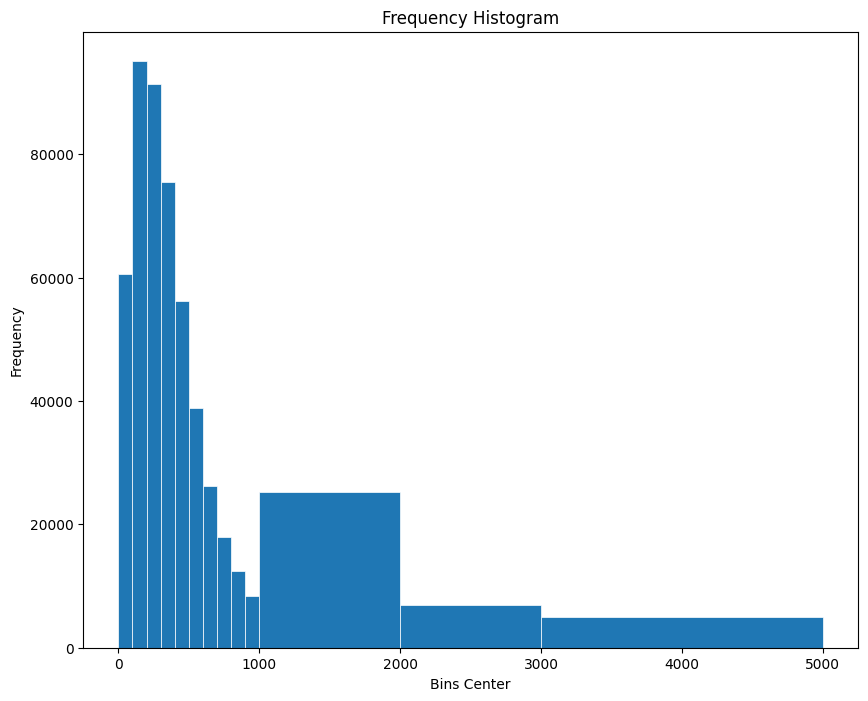

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(data.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

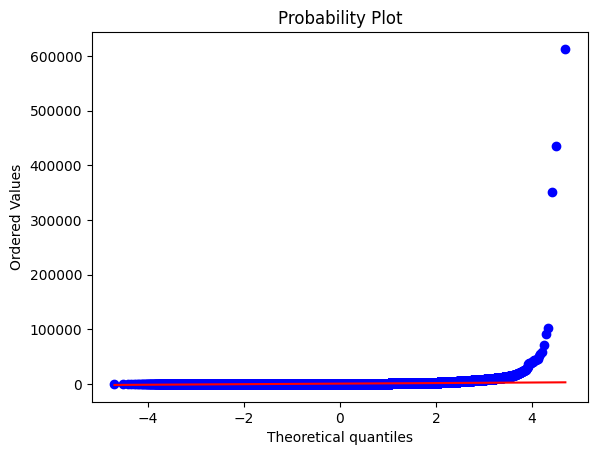

In [6]:
import pylab 
import scipy.stats as stats
stats.probplot(data.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

In [7]:
dataset=data.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

In [8]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [9]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[6:15],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [10]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375703 entries, 0 to 522515
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               313207 non-null  object 
 3   PrepTime               375703 non-null  object 
 4   TotalTime              375703 non-null  object 
 5   RecipeIngredientParts  375703 non-null  object 
 6   Calories               375703 non-null  float64
 7   FatContent             375703 non-null  float64
 8   SaturatedFatContent    375703 non-null  float64
 9   CholesterolContent     375703 non-null  float64
 10  SodiumContent          375703 non-null  float64
 11  CarbohydrateContent    375703 non-null  float64
 12  FiberContent           375703 non-null  float64
 13  SugarContent           375703 non-null  float64
 14  ProteinContent         375703 non-nu

In [11]:
extracted_data.iloc[:,6:15].corr()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.767356,0.603317,0.478934,0.501082,0.711640,0.458711,0.180895,0.689447
FatContent,0.767356,1.000000,0.767357,0.440515,0.381944,0.223549,0.192142,0.042603,0.468088
SaturatedFatContent,0.603317,0.767357,1.000000,0.512186,0.319671,0.176623,0.044003,0.090721,0.388618
CholesterolContent,0.478934,0.440515,0.512186,1.000000,0.335843,0.066104,-0.047346,-0.036112,0.675302
SodiumContent,0.501082,0.381944,0.319671,0.335843,1.000000,0.294636,0.260479,-0.055518,0.500457
CarbohydrateContent,0.711640,0.223549,0.176623,0.066104,0.294636,1.000000,0.580535,0.390120,0.255447
FiberContent,0.458711,0.192142,0.044003,-0.047346,0.260479,0.580535,1.000000,0.068758,0.273488
SugarContent,0.180895,0.042603,0.090721,-0.036112,-0.055518,0.390120,0.068758,1.000000,-0.120441
ProteinContent,0.689447,0.468088,0.388618,0.675302,0.500457,0.255447,0.273488,-0.120441,1.000000


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:15].to_numpy())

In [13]:
extracted_data.isnull().sum()

RecipeId                     0
Name                         0
CookTime                 62496
PrepTime                     0
TotalTime                    0
RecipeIngredientParts        0
Calories                     0
FatContent                   0
SaturatedFatContent          0
CholesterolContent           0
SodiumContent                0
CarbohydrateContent          0
FiberContent                 0
SugarContent                 0
ProteinContent               0
RecipeInstructions           0
dtype: int64

In [14]:
prep_data

array([[-0.55093359, -0.91281917, -0.77924852, ...,  0.15672078,
         2.35502102, -0.68338127],
       [ 1.47428542,  1.13139595, -0.0647135 , ...,  3.91055068,
         2.56324444,  1.25158691],
       [-0.92414618, -1.11248669, -1.12222533, ...,  0.4855234 ,
         0.98513013, -0.60183088],
       ...,
       [ 0.49162165,  0.73206091,  1.85024037, ..., -0.61048534,
         1.76322815, -0.56476253],
       [ 0.25704672,  0.03797856,  1.02137974, ..., -0.61048534,
         1.54404561, -0.63148557],
       [-1.40937801, -1.09347074, -1.12222533, ..., -0.82968708,
        -0.94367625, -0.74269064]])

In [15]:
# from sklearn.cluster import OPTICS
# from sklearn.metrics import silhouette_score
# import pandas as pd

# # Select the first 100,000 rows
# # prep_data = prep_data[:100000]

# # Instantiate the OPTICS algorithm
# optics = OPTICS(min_samples=10)

# # Fit the algorithm to the data
# optics.fit(prep_data)



C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(min_samples=10)

In [15]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
# Instantiate the OPTICS algorithm
optics = OPTICS(min_samples=10)

# Fit the algorithm to the data and predict the cluster labels
labels = optics.fit_predict(prep_data)

# Calculate the silhouette score
silhouette_avg = silhouette_score(prep_data, labels)

print(f"Number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Silhouette score: {silhouette_avg}")

C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Number of clusters: 655
Silhouette score: -0.6728856832220236


In [18]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import numpy as np

neigh = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
neigh.fit(prep_data)

distances, indices = neigh.kneighbors(prep_data)

labels = np.argmin(distances, axis=1)
score = silhouette_score(prep_data, labels=labels, metric='cosine')
print(f"Silhouette score: {score:.3f}")

In [22]:
# use a clustering algorithm to determine the labels
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(prep_data)

labels = kmeans.labels_
score = silhouette_score(prep_data, labels=labels, metric='cosine')
print(f"Silhouette score: {score:.3f}")





# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import numpy as np
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(prep_data)
# labels = kmeans.labels_
# score = silhouette_score(prep_data, labels=labels, metric='cosine')
# print(f"Silhouette score: {score:.3f}")





# X = prep_data

# wcss=[]
# for i in range(2,11):
#     km=KMeans(n_clusters=i)
#     km.fit(X)
#     wcss.append(km.inertia_)
# #The elbow curve
# plt.figure(figsize=(12,6))
# plt.plot(range(2,11),wcss)
# plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
# plt.xlabel("K Value")
# plt.xticks(np.arange(1,11,1))
# plt.ylabel("WCSS")
# plt.show()



# #Taking 5 clusters
# km1=KMeans(n_clusters=5)
# # Fitting the input data
# km1.fit(X)
# # predicting the labels of the input data
# y=km1.predict(prep_data)
# #adding the labels to a column named label
# extracted_data["label"] = y
# #The new dataframe with the clustering done




AttributeError: 'NoneType' object has no attribute 'split'

In [17]:
# extracting the above mentioned columns
X = prep_data
X1 = extracted_data.iloc[:,6:15].values
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.3, min_samples = 4).fit(X) # fitting the model
labels = dbscan.labels_ # getting the labels

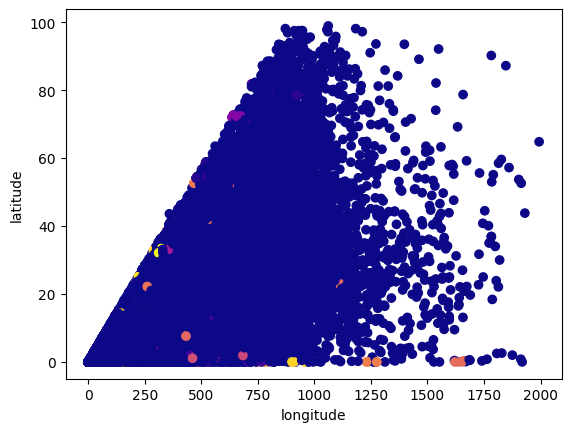

In [18]:
plt.scatter(X1[:, 0], X1[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("longitude") # X-axis label
plt.ylabel("latitude") # Y-axis label
plt.show() # showing the plot

In [19]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print(f"Silhouette score: {score:.3f}")

Silhouette score: -0.620


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [16]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [41]:
pipeline.transform(extracted_data.iloc[0:3,6:15].to_numpy())[2]

array([     2, 211074, 302270, 276463, 297663, 218256, 285601, 244492,
       303607, 216264], dtype=int64)

In [39]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:2,6:15].to_numpy())[1]]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
63873,68351,Mole Coloradito Oaxaca,PT20M,PT2H,PT2H20M,"c(""dried ancho chiles"", ""raisins"", ""bitterswee...",614.4,25.8,2.5,0.0,1807.5,87.3,23.1,29.7,24.1,"c(""For mole paste: Cut chiles open vertically,..."
158117,165643,Citrus Salad With Peanut Butter Dressing,NaN,PT25M,PT25M,"c(""red onion"", ""radish"", ""canned black beans"",...",460.4,25.1,4.4,23.8,1115.3,43.7,10.9,20.1,21.8,"c(""To prepare salad soak red onion and radishe..."
220669,230014,Sweet Bourbon Baked Beans,PT40M,PT20M,PT1H,"c(""bacon"", ""onion"", ""kidney beans"", ""dark mola...",552.8,18.5,6.0,25.7,1611.6,74.6,15.0,30.7,19.7,"c(""Preheat oven to 350º."", ""Cook bacon until c..."
217784,227057,Stove Top Bean Bake,PT30M,PT10M,PT40M,"c(""lean bacon"", ""tomato puree"", ""tomato paste""...",605.2,25.5,6.6,23.1,1216.5,68.3,17.4,26.1,33.0,"c(""Cook bacon and onion over low heat till bac..."
117755,123931,Bean and Banana Dip,PT10M,PT20M,PT30M,"c(""mild Italian sausage"", ""onion"", ""garlic clo...",505.4,17.1,6.1,35.2,1218.2,71.6,13.1,27.2,21.9,"c(""In a large saucepan, sauté the sausage over..."
212695,221848,Cranberry Avocado Sandwich,NaN,PT5M,PT5M,"c(""avocado"", ""reduced-fat swiss cheese"", ""crai...",360.6,17.7,3.4,37.6,754.3,35.6,8.4,21.4,20.4,"""Toast the bread. Layer cheese and chicken on..."
269200,279959,Mohney Reunion Beans,PT1H,PT45M,PT1H45M,"c(""bulk sausage"", ""onion"", ""celery"", ""mustard""...",451.0,15.5,4.2,58.0,1110.6,58.6,10.6,23.3,22.5,"c(""In a large skillet, brown sausage, onions, ..."
504720,523018,Green Tomatillo Sauce,PT45M,PT10M,PT55M,"c(""onion"", ""broth"", ""cilantro"", ""salt"")",437.7,21.1,2.3,0.7,1235.0,58.3,18.4,34.1,14.8,"c(""Chop onion."", ""Remove husk from tomatillos ..."
61204,65593,My Mama's Weird Eggplant (Aubergine),PT10M,PT10M,PT20M,"c(""eggplants"", ""garlic cloves"", ""fresh ginger""...",469.2,26.1,3.5,0.0,1783.8,58.0,19.7,34.2,9.7,"c(""Before cooking, prick eggplant in several p..."


In [19]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,9.8,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a..."
22,60,Blueberry Dessert,NaN,PT35M,PT35M,"c(""Bisquick baking mix"", ""sugar"", ""butter"", ""m...",381.1,17.3,8.8,62.1,437.6,54.5,1.6,36.9,3.9,"c(""Heat oven to 400 degrees."", ""Mix 2 cups bak..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522484,541351,Spinach & Mushroom Quiche with Boursin,PT1H,PT20M,PT1H20M,"c(""butter"", ""onion"", ""sweet pepper"", ""carrots""...",197.6,11.0,4.0,82.2,283.3,19.0,2.0,3.0,6.1,"c(""Bake pie crust(s) according to package inst..."
522490,541357,Chocolate Rum Snowballs,PT8M,PT15M,PT23M,"c(""rolled oats"", ""sweetened flaked coconut"", ""...",127.8,6.2,4.1,14.9,57.9,15.8,1.3,9.4,1.8,"c(""In a large mixing bowl, combine oats, 1 cup..."
522500,541367,Thick Peanut Pancakes,PT10M,PT45M,PT55M,"c(""plain flour"", ""baking powder"", ""baking soda...",712.9,25.4,8.6,121.4,503.9,100.3,6.0,20.2,23.2,"c(""Add rock sugar to milk."", ""Steam milk at lo..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ..."


# Creating functions

In [20]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,6:15].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[6:15],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)] 
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommend(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)
